# Exploratory Data Analysis (YouTube Comments)

In [1]:
import pandas as pd
import numpy as np
import ast
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
DATA_PATH = Path('..') / 'data' / 'vibe_coding_yt_comments_clean.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,video_id,comment_id,parent_id,author,text,like_count,published_at,updated_at,reply_count
0,2wwp3dKbGE8,Ugwj1M5bLivVlqF4KkZ4AaABAg,NaN,musfifirah7538,"['bang', 'gimana', 'kalau', 'pemula', 'banget'...",0,2025-11-19T11:44:32Z,2025-11-19T11:44:32Z,0.0
1,2wwp3dKbGE8,UgzZwHJ7sB8GMMgehFB4AaABAg,NaN,advhe77,"['prinsip2', 'dasar', 'foundamentalnya', 'jgn'...",0,2025-11-18T02:28:17Z,2025-11-18T02:28:17Z,0.0
2,2wwp3dKbGE8,UgydMEecb1Nh-PRBgq94AaABAg,NaN,zororaka,"['sekedar', 'sharing', 'aja', 'pernah', 'disku...",0,2025-11-17T05:25:58Z,2025-11-17T05:29:49Z,0.0
3,2wwp3dKbGE8,UgxoF9XGiQczCku-ZqJ4AaABAg,NaN,reafterstudio,"['bukan', 'programer', 'tapi', 'butuh', 'websi...",0,2025-11-14T23:31:39Z,2025-11-14T23:31:39Z,0.0
4,2wwp3dKbGE8,UgzAbfd4HeGD1h1UxPJ4AaABAg,NaN,kurabasakurata2575,"['biasa', 'ngehandle', 'pekerjaan', 'sendiri',...",0,2025-11-13T00:32:17Z,2025-11-13T00:32:17Z,0.0


In [3]:
def ensure_list(x):
    if isinstance(x, list):
        return x
    try:
        v = ast.literal_eval(str(x))
        if isinstance(v, list):
            return v
        return [str(v)]
    except Exception:
        s = str(x)
        return [t for t in s.split() if t]

if 'text' in df.columns:
    df['text'] = df['text'].apply(ensure_list)

if 'published_at' in df.columns:
    df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
if 'updated_at' in df.columns:
    df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   video_id      844 non-null    object             
 1   comment_id    958 non-null    object             
 2   parent_id     415 non-null    object             
 3   author        957 non-null    object             
 4   text          958 non-null    object             
 5   like_count    958 non-null    int64              
 6   published_at  958 non-null    datetime64[ns, UTC]
 7   updated_at    958 non-null    datetime64[ns, UTC]
 8   reply_count   543 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(1), int64(1), object(5)
memory usage: 67.5+ KB


In [4]:
df.isnull().sum()

video_id        114
comment_id        0
parent_id       543
author            1
text              0
like_count        0
published_at      0
updated_at        0
reply_count     415
dtype: int64

In [19]:
dup_count_text = df.duplicated(subset=["comment_id"]).sum()
dup_count_text

60

In [20]:
cols = [c for c in df.columns if c != "text"]
dup_count = df.duplicated(subset=cols).sum()
dup_count

0

In [18]:
print("Descriptive Statistik (Numerical Data):")
df.describe()

Descriptive Statistik (Numerical Data):


,like_count,reply_count,text_len
count,958.000000,543.000000,958.000000
mean,1.734864,0.653775,26.542797
std,9.897946,1.636140,46.195258
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000
50%,0.000000,0.000000,12.000000
75%,1.000000,1.000000,29.000000
max,191.000000,14.000000,831.000000


In [17]:
print("Descriptive Statistik (All Data):")
df.describe(include='all')

Descriptive Statistik (All Data):


,video_id,comment_id,parent_id,author,text,like_count,published_at,updated_at,reply_count,is_reply,text_len
count,844,958,415,957,958,958.000000,958,958,543.000000,958,958.000000
unique,4,898,178,620,880,NaN,NaN,NaN,NaN,2,NaN
top,3UTMXKg47BM,Ugy8ShcZBLhxwiVh2614AaABAg.AI_aS0c87YVAI_jZyHCaln,UgzNRPEU1q-rlCkt-1t4AaABAg,sandhikagalihwpu,[],NaN,NaN,NaN,NaN,False,NaN
freq,411,2,19,65,12,NaN,NaN,NaN,NaN,543,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.734864,2025-09-10 19:20:15.948851712+00:00,2025-09-10 22:59:58.515657728+00:00,0.653775,NaN,26.542797
min,NaN,NaN,NaN,NaN,NaN,0.000000,2025-05-26 07:31:48+00:00,2025-05-26 07:31:48+00:00,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,2025-09-05 07:16:24+00:00,2025-09-05 07:46:06+00:00,0.000000,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,2025-10-13 13:18:18.500000+00:00,2025-10-13 13:20:36.500000+00:00,0.000000,NaN,12.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,2025-10-15 07:12:09+00:00,2025-10-15 07:14:42.500000+00:00,1.000000,NaN,29.000000
max,NaN,NaN,NaN,NaN,NaN,191.000000,2025-11-25 06:56:56+00:00,2025-11-25 06:56:56+00:00,14.000000,NaN,831.000000


## Distribusi Like

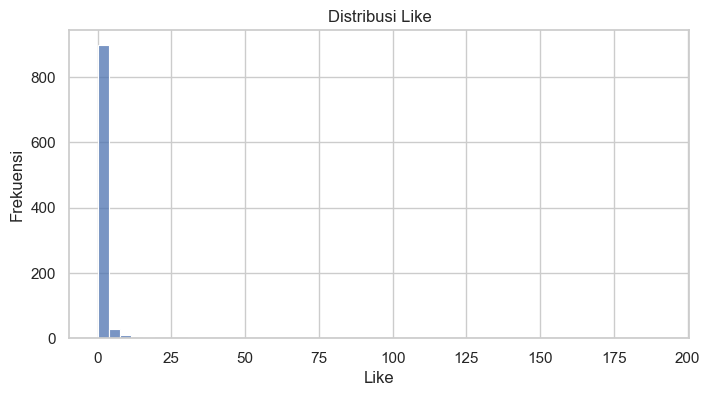

In [7]:
if 'like_count' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['like_count'].fillna(0), bins=50)
    plt.title('Distribusi Like')
    plt.xlabel('Like')
    plt.ylabel('Frekuensi')
    plt.show()

## Komentar vs Reply

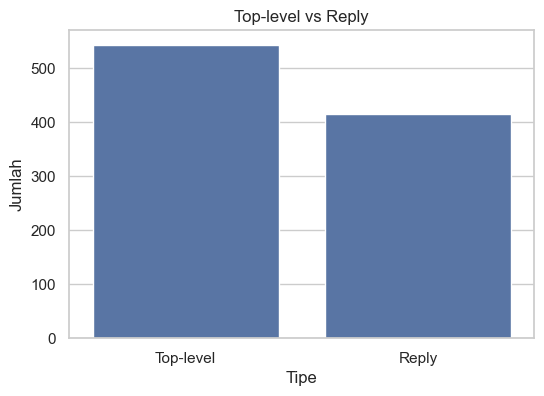

In [8]:
if 'parent_id' in df.columns:
    df['is_reply'] = df['parent_id'].notna()
    counts = df['is_reply'].value_counts()
    counts
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index.map({True:'Reply', False:'Top-level'}), y=counts.values)
    plt.title('Top-level vs Reply')
    plt.ylabel('Jumlah')
    plt.xlabel('Tipe')
    plt.show()

## Top Author berdasarkan jumlah komentar

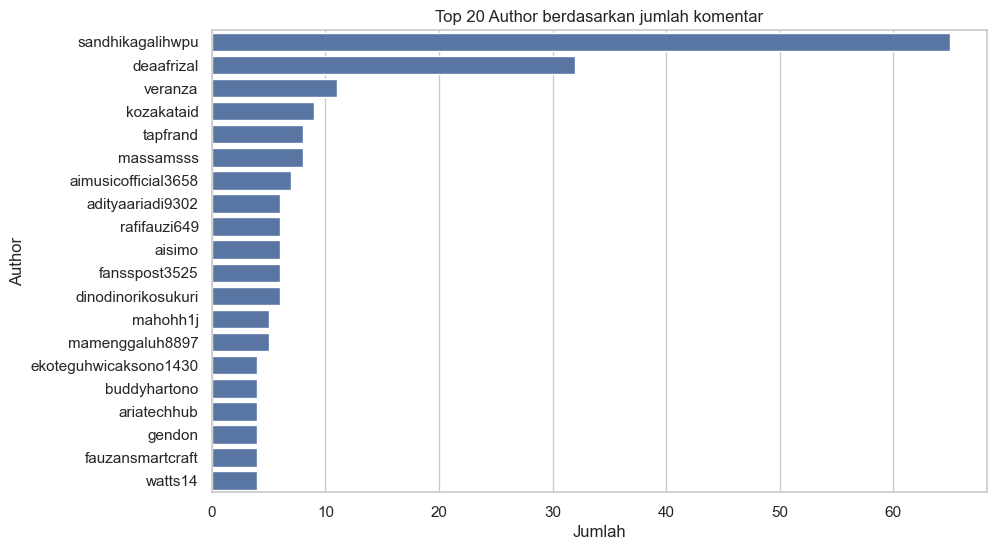

In [9]:
if 'author' in df.columns:
    top_authors = df['author'].value_counts().head(20)
    top_authors
    plt.figure(figsize=(10,6))
    sns.barplot(y=top_authors.index, x=top_authors.values)
    plt.title('Top 20 Author berdasarkan jumlah komentar')
    plt.xlabel('Jumlah')
    plt.ylabel('Author')
    plt.show()

## Panjang komentar (jumlah token)

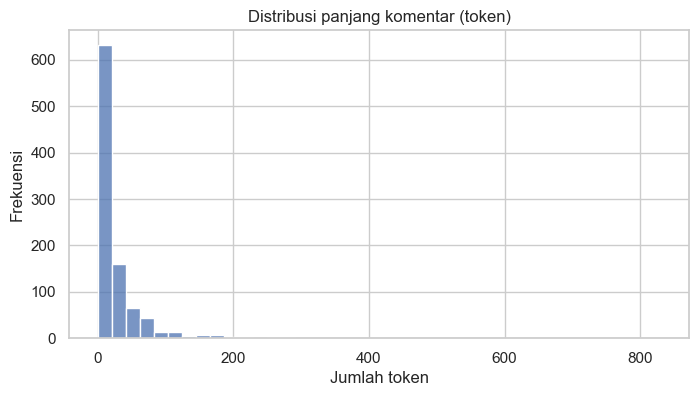

In [10]:
if 'text' in df.columns:
    df['text_len'] = df['text'].apply(lambda t: len(t) if isinstance(t, list) else 0)
    df['text_len'].describe()
    plt.figure(figsize=(8,4))
    sns.histplot(df['text_len'], bins=40)
    plt.title('Distribusi panjang komentar (token)')
    plt.xlabel('Jumlah token')
    plt.ylabel('Frekuensi')
    plt.show()

## Token paling sering muncul

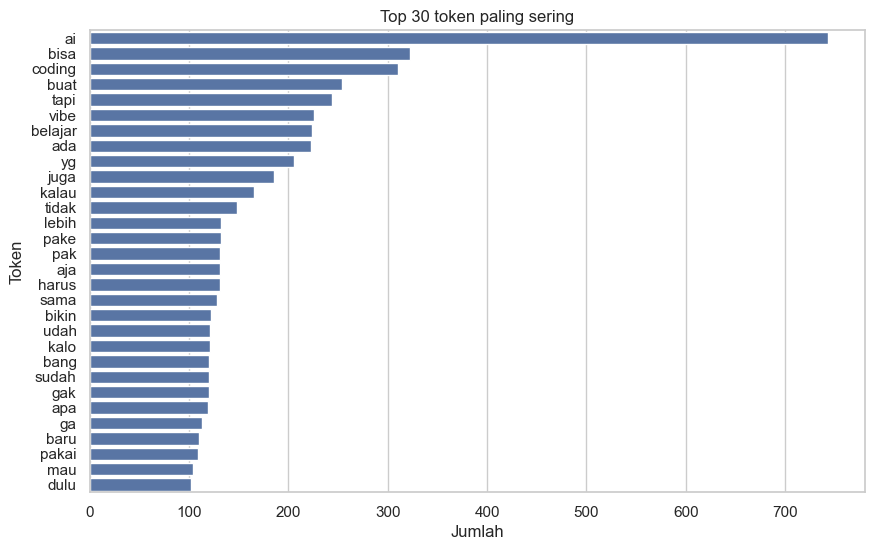

In [11]:
from collections import Counter
if 'text' in df.columns:
    counter = Counter()
    for toks in df['text']:
        if isinstance(toks, list):
            counter.update(toks)
    top_tokens = counter.most_common(30)
    pd.DataFrame(top_tokens, columns=['token','count'])
    plt.figure(figsize=(10,6))
    tokens, counts = zip(*top_tokens) if top_tokens else ([], [])
    sns.barplot(y=list(tokens), x=list(counts))
    plt.title('Top 30 token paling sering')
    plt.xlabel('Jumlah')
    plt.ylabel('Token')
    plt.show()

## Tren waktu komentar

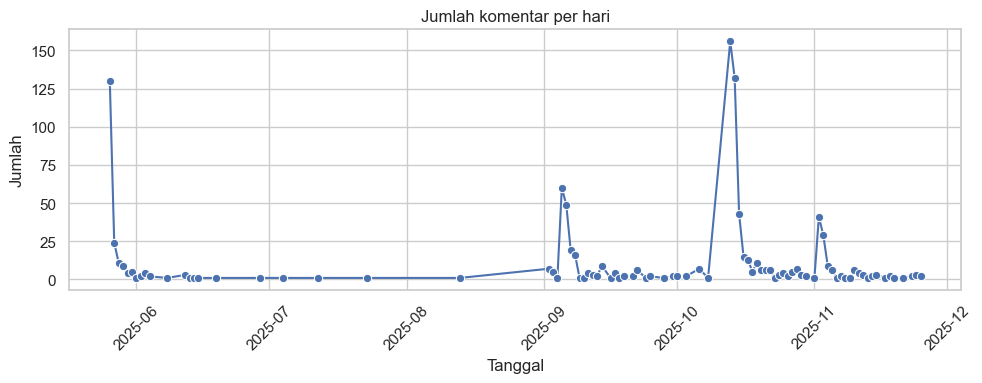

In [12]:
if 'published_at' in df.columns:
    ts = df.dropna(subset=['published_at']).copy()
    ts['date'] = ts['published_at'].dt.date
    counts_by_day = ts.groupby('date').size().reset_index(name='count')
    counts_by_day
    plt.figure(figsize=(10,4))
    sns.lineplot(data=counts_by_day, x='date', y='count', marker='o')
    plt.title('Jumlah komentar per hari')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()